In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.preprocessing import StandardScaler

In [ ]:
# 1. 데이터 로드 및 전처리
def load_and_preprocess(filepath):
    df = pd.read_csv('/content/drive/MyDrive/customer_churn.csv')
    # 필요한 컬럼만 사용
    features = ['age', 'monthly_usage', 'contract_length', 'support_calls', 'payment_delay']
    X = df[features]
    y = df['churn']
    # 스케일링
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    return X_scaled, y

In [ ]:
# 2. 모델 정의
def get_models():
    models = {
        'Bagging': BaggingClassifier(random_state=42),
        'RandomForest': RandomForestClassifier(random_state=42),
        'AdaBoost': AdaBoostClassifier(random_state=42)
    }
    return models

In [ ]:
# 3. 교차검증 평가 함수
def evaluate_models(models, X, y, cv_splits=5):
    results = []
    cv = StratifiedKFold(n_splits=cv_splits, shuffle=True, random_state=42)
    for name, model in models.items():
        start = time.time()
        acc_scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
        auc_scores = cross_val_score(model, X, y, cv=cv, scoring='roc_auc')
        elapsed = time.time() - start
        results.append({
            'Model': name,
            'CV Accuracy': np.mean(acc_scores),
            'CV AUC': np.mean(auc_scores),
            'Time (s)': elapsed
        })
    return pd.DataFrame(results)

In [ ]:
# 4. 성능 비교 시각화
def plot_results(results_df):
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    sns.barplot(x='Model', y='CV Accuracy', data=results_df, ax=axes[0])
    axes[0].set_title('CV Accuracy by Model')
    sns.barplot(x='Model', y='CV AUC', data=results_df, ax=axes[1])
    axes[1].set_title('CV AUC by Model')
    plt.tight_layout()
    plt.show()

In [ ]:
# 5. 분석 및 결론 출력
def print_analysis(results_df):
    print("\n[모델별 분석 및 적합한 모델 선정]")
    best_row = results_df.loc[results_df['CV AUC'].idxmax()]
    for idx, row in results_df.iterrows():
        print(f"\n- {row['Model']}:")
        print(f"  * CV Accuracy: {row['CV Accuracy']:.4f}")
        print(f"  * CV AUC: {row['CV AUC']:.4f}")
        print(f"  * Time (s): {row['Time (s)']:.2f}")
        if row['Model'] == best_row['Model']:
            print("  => 가장 높은 AUC를 기록하여 최적의 모델로 선정됨.")
    print("\n[결론]")
    print(f"본 데이터셋에서는 '{best_row['Model']}' 모델이 가장 우수한 성능(AUC 기준)을 보였습니다. "
          "따라서 해당 모델을 추천합니다. 다만, 실제 적용 시에는 데이터 특성, 해석 용이성, 시간 등도 함께 고려해야 합니다.")


[성능 비교표]
          Model  CV Accuracy    CV AUC  Time (s)
0       Bagging        0.810  0.470313  0.565518
1  RandomForest        0.818  0.491443  5.756109
2      AdaBoost        0.840  0.506994  1.150887


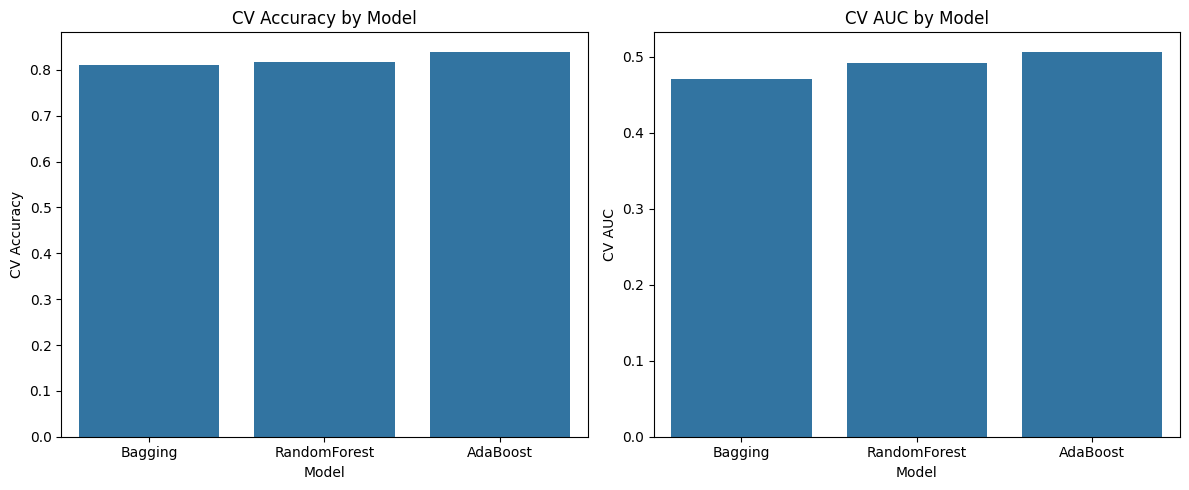


[모델별 분석 및 적합한 모델 선정]

- Bagging:
  * CV Accuracy: 0.8100
  * CV AUC: 0.4703
  * Time (s): 0.57

- RandomForest:
  * CV Accuracy: 0.8180
  * CV AUC: 0.4914
  * Time (s): 5.76

- AdaBoost:
  * CV Accuracy: 0.8400
  * CV AUC: 0.5070
  * Time (s): 1.15
  => 가장 높은 AUC를 기록하여 최적의 모델로 선정됨.

[결론]
본 데이터셋에서는 'AdaBoost' 모델이 가장 우수한 성능(AUC 기준)을 보였습니다. 따라서 해당 모델을 추천합니다. 다만, 실제 적용 시에는 데이터 특성, 해석 용이성, 시간 등도 함께 고려해야 합니다.


In [ ]:
# 6. 메인 실행
def main():
    filepath = 'customer_churn.csv'
    X, y = load_and_preprocess(filepath)
    models = get_models()
    results_df = evaluate_models(models, X, y)
    print("[성능 비교표]")
    print(results_df)
    plot_results(results_df)
    print_analysis(results_df)

if __name__ == "__main__":
    main()